In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%config Completer.use_jedi = False

In [3]:
!nvidia-smi

Mon Jan 31 06:54:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
torch.__version__

'1.7.1+cu110'

In [5]:
!pip install --upgrade fastai

     |████████████████████████████████| 189 kB 11.7 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
import fastai 
fastai.__version__

'2.5.3'

In [5]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [6]:
import os 
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [11]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [12]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
data_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [ ]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]
data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch,
                                    valid_pct=0.15, shuffle=True)

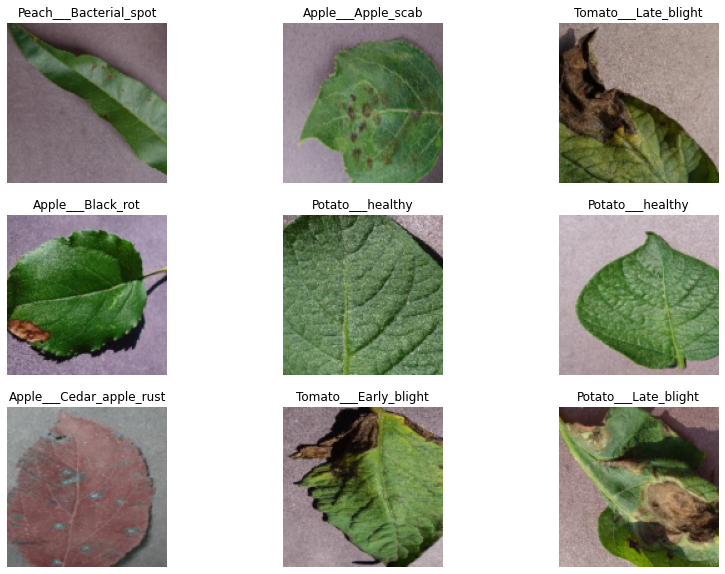

In [ ]:
data.show_batch(figsize=(14,10))

In [ ]:
print('Number of classes', data.c)

Number of classes 38


In [ ]:
model = cnn_learner(data,resnet34,metrics=accuracy, model_dir='/tmp/model/')

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0014454397605732083)

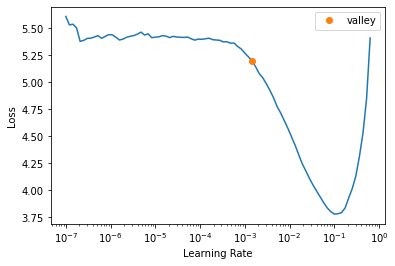

In [ ]:
model.lr_find()

In [ ]:
model.fit_one_cycle(5, 12e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.456981,0.380651,0.894613,06:55
1,0.270354,0.124367,0.959636,06:22
2,0.145377,0.047970,0.983763,06:23
3,0.072920,0.026218,0.991123,06:24
4,0.056251,0.019764,0.993399,06:24


In [ ]:
model.save('my_model.pkl')

Path('/tmp/model/my_model.pkl.pth')

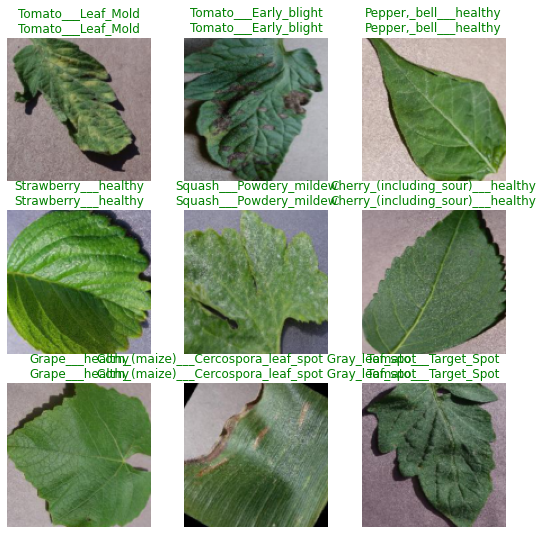

In [ ]:
model.show_results()

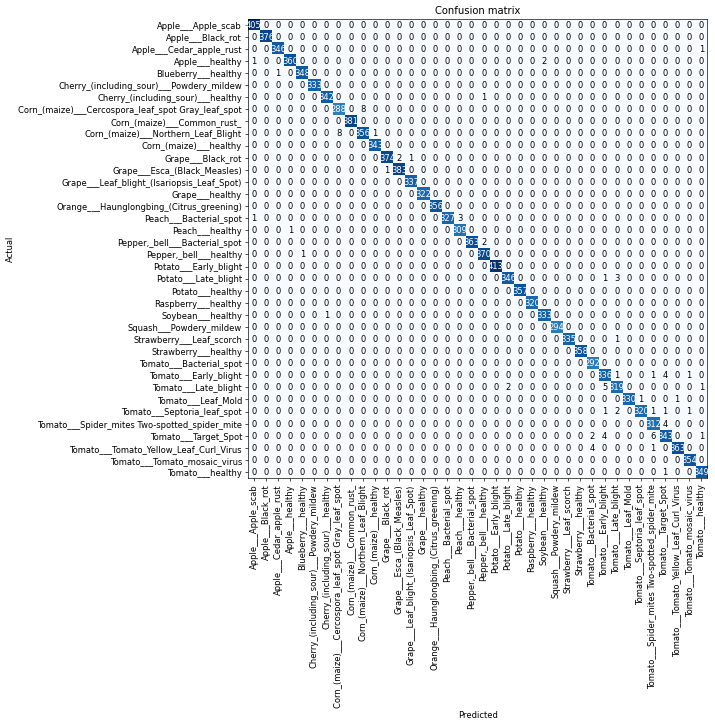

In [ ]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interpretation.most_confused(min_val=2)

[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  8),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  8),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 6),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 5),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 4),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 4),
 ('Tomato___Target_Spot', 'Tomato___Early_blight', 4),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 4),
 ('Peach___Bacterial_spot', 'Peach___healthy', 3),
 ('Potato___Late_blight', 'Tomato___Late_blight', 3),
 ('Apple___healthy', 'Soybean___healthy', 2),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 2),
 ('Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 2),
 ('Tomato___Late_blight', 'Potato___Late_blight', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 2),
 ('Tom